In [2]:
import spekpy
import os
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# tube_potential = 120 # keV
tube_potential = 120
anode_angle = 12 # deg
bin_width = 0.5 # keV
s = spekpy.Spek(kvp=tube_potential, th=anode_angle, dk=bin_width, mu_data_source='nist', physics='spekcalc')

In [7]:
print(s.get_spectrum())

(array([  1.25,   1.75,   2.25,   2.75,   3.25,   3.75,   4.25,   4.75,
         5.25,   5.75,   6.25,   6.75,   7.25,   7.75,   8.25,   8.75,
         9.25,   9.75,  10.25,  10.75,  11.25,  11.75,  12.25,  12.75,
        13.25,  13.75,  14.25,  14.75,  15.25,  15.75,  16.25,  16.75,
        17.25,  17.75,  18.25,  18.75,  19.25,  19.75,  20.25,  20.75,
        21.25,  21.75,  22.25,  22.75,  23.25,  23.75,  24.25,  24.75,
        25.25,  25.75,  26.25,  26.75,  27.25,  27.75,  28.25,  28.75,
        29.25,  29.75,  30.25,  30.75,  31.25,  31.75,  32.25,  32.75,
        33.25,  33.75,  34.25,  34.75,  35.25,  35.75,  36.25,  36.75,
        37.25,  37.75,  38.25,  38.75,  39.25,  39.75,  40.25,  40.75,
        41.25,  41.75,  42.25,  42.75,  43.25,  43.75,  44.25,  44.75,
        45.25,  45.75,  46.25,  46.75,  47.25,  47.75,  48.25,  48.75,
        49.25,  49.75,  50.25,  50.75,  51.25,  51.75,  52.25,  52.75,
        53.25,  53.75,  54.25,  54.75,  55.25,  55.75,  56.25,  56.75,
     

In [61]:
base_dir = os.path.abspath('/dtu/3d-imaging-center/projects/2022_DANFIX_Vindelev/analysis/s214743_bsc/')

In [62]:
s.export_spectrum(os.path.join(base_dir,"xray_spectra.txt"))

spectrum name
/dtu/3d-imaging-center/projects/2022_DANFIX_Vindelev/analysis/s214743_bsc/xray_spectra.txt


In [63]:
# Define the path to your file
file_path = os.path.join(base_dir,"xray_spectra.txt")
# Initialize an empty list to store the data
spectral_data = []

# Open the file and read the lines
with open(file_path, 'r') as file:
    # Skip the header
    for line in file:
        if line.startswith('#'):
            continue
        
        parts = line.strip().split(';')
        if len(parts) == 3:
            energy, photons_per_kev_cm2, unknown = parts
            spectral_data.append((float(energy), float(photons_per_kev_cm2), float(unknown)))

# Now, `spectral_data` contains the spectral data
print(spectral_data[:5])  # Print first 5 rows to check

[(1.25, 8027057.5721, 0.0), (1.75, 10452458.0418, 0.0), (2.25, 3551487.6461, 0.0), (2.75, 3293100.1043, 0.0), (3.25, 3957126.8736, 0.0)]


In [64]:
spec_arr = np.array(spectral_data)

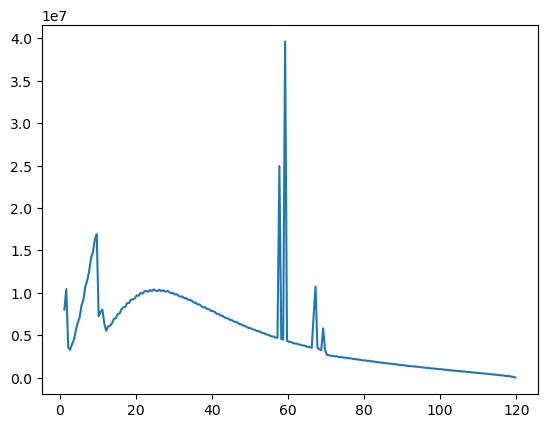

In [65]:
plt.plot(spec_arr[:,0],spec_arr[:,1]-0*spec_arr[:,2])

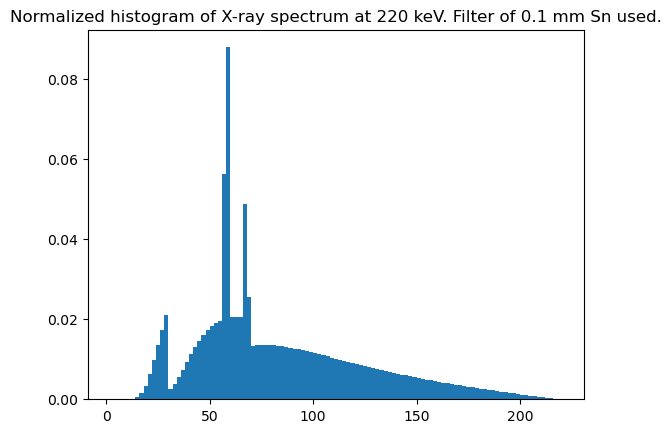

(array([  3.,   5.,   7.,   9.,  11.,  13.,  15.,  17.,  19.,  21.,  23.,
         25.,  27.,  29.,  31.,  33.,  35.,  37.,  39.,  41.,  43.,  45.,
         47.,  49.,  51.,  53.,  55.,  57.,  59.,  61.,  63.,  65.,  67.,
         69.,  71.,  73.,  75.,  77.,  79.,  81.,  83.,  85.,  87.,  89.,
         91.,  93.,  95.,  97.,  99., 101., 103., 105., 107., 109., 111.,
        113., 115., 117., 119., 121., 123., 125., 127., 129., 131., 133.,
        135., 137., 139., 141., 143., 145., 147., 149., 151., 153., 155.,
        157., 159., 161., 163., 165., 167., 169., 171., 173., 175., 177.,
        179., 181., 183., 185., 187., 189., 191., 193., 195., 197., 199.,
        201., 203., 205., 207., 209., 211., 213., 215., 217., 219.]),
 array([3.35494101e-22, 1.32128929e-29, 1.23241791e-13, 3.93842044e-07,
        9.67920380e-06, 7.21427036e-05, 4.44250798e-04, 1.49014527e-03,
        3.42758381e-03, 6.22812039e-03, 9.67983469e-03, 1.34875459e-02,
        1.73571769e-02, 2.10354834e-02, 2.485327

In [6]:
def generate_specrum(plot=False):
    # tube_potential = 120 # keV
    tube_potential = 220
    # anode_angle = 90 # deg
    anode_angle = 12
    bin_width = 2 # keV
    # bin_width = 0.5
    # data_source = 'pene'
    data_source = 'nist'
    physics_arr = ['diff','spekpy-v1', 'spekcalc','casim','kqp']
    physics = physics_arr[3]
    # physics = 'classical'
    # spectrum = spekpy.Spek(kvp=tube_potential, th=anode_angle, dk=bin_width, mu_data_source='nist', physics='casim')
    spectrum = spekpy.Spek(kvp=tube_potential, th=anode_angle, dk=bin_width, mu_data_source=data_source, physics=physics,char=1)
    filter_thickness = 0.1
    spectrum.filter('Sn',filter_thickness)
    spectrum = np.array(spectrum.get_spectrum())
    spectrum[1,:] /= np.sum(spectrum[1,:])

    num_bins = spectrum.shape[1]

    bin_centers = spectrum[0,:]
    bin_heights = spectrum[1,:]
    bin_edges = np.array(bin_centers) - bin_width/2
    bin_edges = np.append(bin_edges, bin_edges[-1] + bin_width)

    if plot == True:
        plt.bar(bin_centers, bin_heights, align='center', width=np.diff(bin_edges))
        plt.title(f'Normalized histogram of X-ray spectrum at {tube_potential} keV. Filter of {filter_thickness} mm Sn used.')
        # plt.yscale('log')
        # plt.ylim(0,bin_width/10*0.1)
        plt.show()

        # plt.bar(bin_centers, bin_heights, align='center', width=np.diff(bin_edges))
        # plt.plot(bin_centers, mu(bin_centers))
    
    return bin_centers, bin_heights

generate_specrum(plot=True)